## Linear Regression

In [24]:
import sys
sys.path.insert(0, '..')

In [25]:
from sklearn.model_selection import train_test_split

from enums import GradientDescentMode, Initialization
from linear import Linear
from loss import MSELoss
from optimizers import SGD

import matplotlib.pyplot as plt
import numpy as np
import warnings

In [26]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

In [27]:
def eval_mse_fn(net, X_test, y_test):
    y_pred = net(X_test)
    return MSELoss()(y_pred, y_test).mean()

### Toys Data

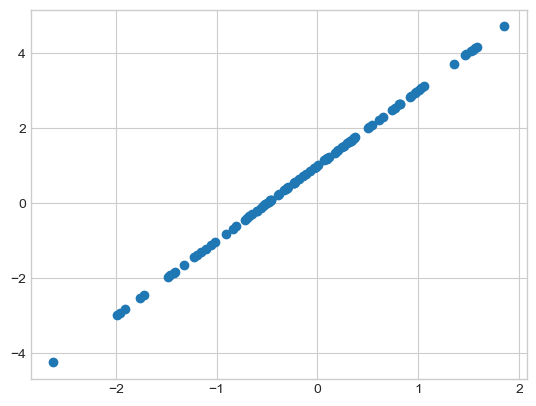

In [5]:
np.random.seed(42)

n_samples = 100
X = np.random.randn(n_samples)
y = 2 * X  + 1

plt.scatter(X, y)
plt.show()
X = X.reshape((-1, 1))


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)
print('Train :', X_train.shape, y_train.shape)
print('Validation :', X_val.shape, y_val.shape)

Train : (80, 1) (80,)
Validation : (20, 1) (20,)


In [7]:
net = Linear(1, 1)
lr = 1e-1
epochs = 200
loss = MSELoss()
all_loss, all_loss_valid, all_acc_valid, best_parameters = SGD(
    net,
    loss,
    lr,
    X_train,
    y_train,
    epochs,
    GradientDescentMode.BATCH,
    -1,
    eval_mse_fn,
    X_val,
    y_val
)

Train : -----------------------------------
Epoch 20: train loss: 0.012006305305273742, val loss: 0.006929897822338635, val eval_fn: 0.006929897822338635
Epoch 40: train loss: 1.0488581871450494e-05, val loss: 6.200000836957467e-06, val eval_fn: 6.200000836957467e-06
Epoch 60: train loss: 9.225996810168468e-09, val loss: 5.487934164655453e-09, val eval_fn: 5.487934164655453e-09
Epoch 80: train loss: 8.119485055532184e-12, val loss: 4.837840789120803e-12, val eval_fn: 4.837840789120803e-12
Epoch 100: train loss: 7.145943937811614e-15, val loss: 4.259695066676375e-15, val eval_fn: 4.259695066676375e-15
Epoch 120: train loss: 6.289149104858892e-18, val loss: 3.7494152580920336e-18, val eval_fn: 3.7494152580920336e-18
Epoch 140: train loss: 5.535061036118843e-21, val loss: 3.29995637503912e-21, val eval_fn: 3.29995637503912e-21
Epoch 160: train loss: 4.871122613574339e-24, val loss: 2.9041770683841677e-24, val eval_fn: 2.9041770683841677e-24
Epoch 180: train loss: 4.2837644699452824e-27, v

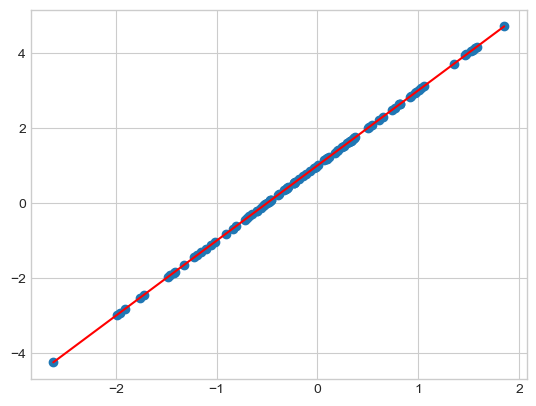

In [8]:
X = X.reshape(-1)
x_min, x_max = X.min(), X.max()
xs = np.linspace(x_min, x_max, 2)
ys = xs * net._parameters['W'].reshape(-1)[0] + net._parameters['b'].reshape(-1)[0] 
plt.plot(xs, ys, 'r-')
plt.scatter(X, y)

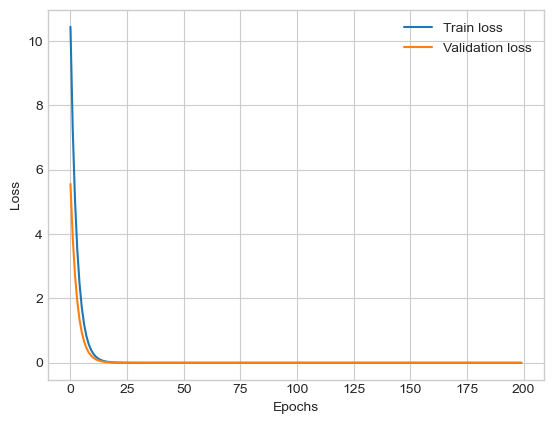

In [9]:
plt.plot(all_loss, label='Train loss')
plt.plot(all_loss_valid, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

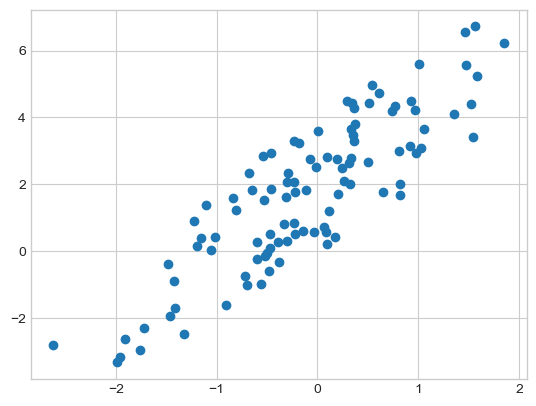

In [10]:
np.random.seed(42)

n_samples = 100
X = np.random.randn(n_samples)
y = 2 * X  + 4 * np.random.random(n_samples)

plt.scatter(X, y)
plt.show()
X = X.reshape((-1, 1))

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)
print('Train :', X_train.shape, y_train.shape)
print('Validation :', X_val.shape, y_val.shape)

Train : (80, 1) (80,)
Validation : (20, 1) (20,)


In [12]:
net = Linear(1, 1)
lr = 1e-1
epochs = 200
loss = MSELoss()
all_loss, all_loss_valid, all_acc_valid, best_parameters = SGD(
    net,
    loss,
    lr,
    X_train,
    y_train,
    epochs,
    GradientDescentMode.BATCH,
    -1,
    eval_mse_fn,
    X_val,
    y_val
)

Train : -----------------------------------
Epoch 20: train loss: 1.3297828298804917, val loss: 1.246400021965063, val eval_fn: 1.246400021965063
Epoch 40: train loss: 1.3218979894615455, val loss: 1.1978355149630597, val eval_fn: 1.1978355149630597
Epoch 60: train loss: 1.3218910764715628, val loss: 1.1965472974226157, val eval_fn: 1.1965472974226157
Epoch 80: train loss: 1.3218910703891322, val loss: 1.1965093130961608, val eval_fn: 1.1965093130961608
Epoch 100: train loss: 1.321891070383779, val loss: 1.196508187245307, val eval_fn: 1.196508187245307
Epoch 120: train loss: 1.3218910703837745, val loss: 1.1965081538526103, val eval_fn: 1.1965081538526103
Epoch 140: train loss: 1.3218910703837743, val loss: 1.1965081528620238, val eval_fn: 1.1965081528620238
Epoch 160: train loss: 1.3218910703837743, val loss: 1.1965081528326373, val eval_fn: 1.1965081528326373
Epoch 180: train loss: 1.321891070383774, val loss: 1.1965081528317656, val eval_fn: 1.1965081528317656
Epoch 200: train loss

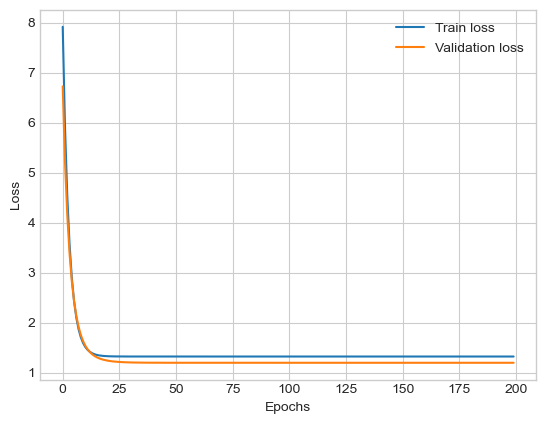

In [14]:
plt.plot(all_loss, label='Train loss')
plt.plot(all_loss_valid, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Boston Data

In [28]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

In [29]:
print('Train :', X_train.shape, y_train.shape)
print('Validation :', X_val.shape, y_val.shape)

Train : (404, 13) (404,)
Validation : (102, 13) (102,)


In [30]:
net = Linear(X_train.shape[1], 1)
lr = 1e-6
epochs = 100
loss = MSELoss()
all_loss, all_loss_valid, all_acc_valid, best_parameters = SGD(
    net,
    loss,
    lr,
    X_train,
    y_train,
    epochs,
    GradientDescentMode.BATCH,
    -1,
    eval_mse_fn,
    X_val,
    y_val
)

Train : -----------------------------------
Epoch 10: train loss: 4668.534840879238, val loss: 4650.399109395707, val eval_fn: 4650.399109395707
Epoch 20: train loss: 1949.825424289744, val loss: 1971.4391763403717, val eval_fn: 1971.4391763403717
Epoch 30: train loss: 896.7494410668453, val loss: 921.5774430816322, val eval_fn: 921.5774430816322
Epoch 40: train loss: 488.11390172712277, val loss: 506.71092023078944, val eval_fn: 506.71092023078944
Epoch 50: train loss: 328.8256727637542, val loss: 340.38990027988126, val eval_fn: 340.38990027988126
Epoch 60: train loss: 266.0248549100715, val loss: 272.00848189633456, val eval_fn: 272.00848189633456
Epoch 70: train loss: 240.57043049606287, val loss: 242.62404358213234, val eval_fn: 242.62404358213234
Epoch 80: train loss: 229.58077265044432, val loss: 229.01539297416122, val eval_fn: 229.01539297416122
Epoch 90: train loss: 224.20284379780384, val loss: 221.94082490176064, val eval_fn: 221.94082490176064
Epoch 100: train loss: 221.01

In [31]:
best_parameters

{'W': array([[ 0.01361944],
        [-0.32633239],
        [ 0.09078585],
        [ 0.15547614],
        [ 0.29995042],
        [ 0.28730319],
        [-0.43519116],
        [-0.26316705],
        [ 0.13577569],
        [-0.17052259],
        [ 0.12842369],
        [ 0.77260305],
        [ 0.14873473]]),
 'b': array([-0.00078745])}

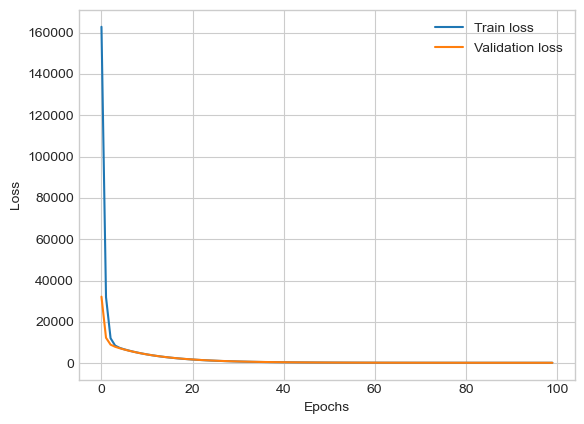

In [32]:
plt.plot(all_loss, label='Train loss')
plt.plot(all_loss_valid, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Fetch california housing

In [33]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

In [21]:
print('Train :', X_train.shape, y_train.shape)
print('Validation :', X_val.shape, y_val.shape)

Train : (16512, 8) (16512,)
Validation : (4128, 8) (4128,)


In [43]:
net = Linear(X_train.shape[1], 1)
lr = 1e-7
epochs = 100
loss = MSELoss()
all_loss, all_loss_valid, all_acc_valid, best_parameters = SGD(
    net,
    loss,
    lr,
    X_train,
    y_train,
    epochs,
    GradientDescentMode.BATCH,
    -1,
    eval_mse_fn,
    X_val,
    y_val
)

Train : -----------------------------------
Epoch 10: train loss: 862.1789010685463, val loss: 799.7400835089776, val eval_fn: 799.7400835089776
Epoch 20: train loss: 842.1910716669933, val loss: 780.174715512378, val eval_fn: 780.174715512378
Epoch 30: train loss: 822.7177587963947, val loss: 761.1095382324488, val eval_fn: 761.1095382324488
Epoch 40: train loss: 803.7453444312141, val loss: 742.5351460901898, val eval_fn: 742.5351460901898
Epoch 50: train loss: 785.2609153457996, val loss: 724.4388891966707, val eval_fn: 724.4388891966707
Epoch 60: train loss: 767.2518912341152, val loss: 706.8084436990699, val eval_fn: 706.8084436990699
Epoch 70: train loss: 749.7060161266381, val loss: 689.6318034323672, val eval_fn: 689.6318034323672
Epoch 80: train loss: 732.6113500285343, val loss: 672.8972717294188, val eval_fn: 672.8972717294188
Epoch 90: train loss: 715.9562607734175, val loss: 656.5934534421817, val eval_fn: 656.5934534421817
Epoch 100: train loss: 699.7294160871285, val los

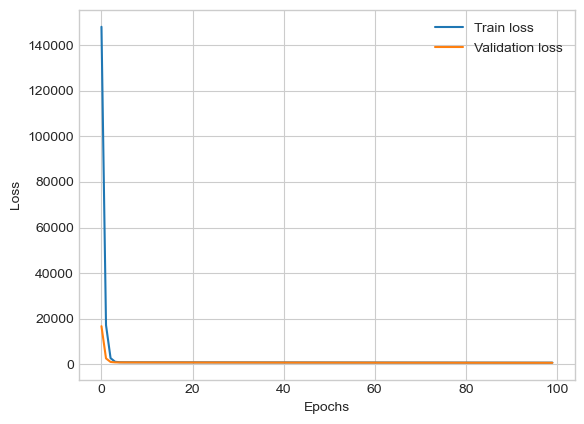

In [45]:
plt.plot(all_loss, label='Train loss')
plt.plot(all_loss_valid, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()